In [ ]:
Лабораторна робота №2 з курсу 'Основи технологій машинного навчання'

Класифікація видів об’єктів.

Предментна область: фрукти.

Види: 1)яблука; 2)апельсини; 3)груші.

Виконала: студентка групи ТІ-72

Скиба Надія Володимирівна

Виконано у сервісі paperspace gradient.

In [1]:
# #hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'a7e5290c71534363978582d101dd3c22')

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128)>

In [5]:
""" 
this is customized function because new version of Bing Api do not support code from fastai example
@see: https://forums.fast.ai/t/02-production-permissiondenied-error/65823/24
"""
def search_images_bing(key, term, max_images: int = 150, **kwargs):    
    params = {'q':term, 'count':max_images}
    headers = {"Ocp-Apim-Subscription-Key":key}
    search_url = "https://api.bing.microsoft.com/v7.0/images/search"
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json() 
   
    # returns an L object to be identical to the original function.
    return L(search_results['value'])

search_images_bing

<function __main__.search_images_bing(key, term, max_images: int = 150, **kwargs)>

In [6]:
results = search_images_bing('a7e5290c71534363978582d101dd3c22', 'apple')
ims = results.attrgot('contentUrl')
len(ims)

150

In [7]:
results

(#150) [{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=apple&id=C0822F771EACE774CF9AEA21CAB4BCAE8F6EAE15&simid=607990176352698619', 'name': 'What Three Education Polls Can Tell Us About Support For ...', 'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.oSFxxYxnq3P-Vvn11sCLUAHaHZ&pid=Api', 'datePublished': '2013-08-28T12:00:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'http://indianapublicmedia.org/stateimpact/files/2013/01/apple-image.jpg', 'hostPageUrl': 'http://indianapublicmedia.org/stateimpact/2013/08/28/education-polls-support-common-core/', 'contentSize': '1629215 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'indianapublicmedia.org/stateimpact/2013/08/28/education-polls-support-common-core', 'width': 2218, 'height': 2216, 'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.OqVYFwaLLjhUBbkDMhn5dQ&pid=Api', 'hostPageDomainFriendlyName': 'WFIU', 'thumbnail': {'width': 474, 'height': 473}, 'imageInsightsToken': 'ccid_oSFxxYxn*cp_

In [8]:
# #hide
# ims = ['https://www.bing.com/images/search?view=detailV2&ccid=UNUJ5MFA&id=69555F765C133E912D1FE193A86D5C7B823E0CE7&thid=OIP.UNUJ5MFAIzB1ofa38efIiQHaFV&mediaurl=http%3A%2F%2Fwww.juimg.com%2Ftuku%2Fyulantu%2F140622%2F330698-14062219122458-lp.jpg&exph=180&expw=250&q=apple&simid=608033469659677040&ck=86B39A2BC1DE8A5FDC5B9A60789D040C&selectedindex=0&form=IRPRST&ajaxhist=0&pivotparams=insightsToken%3Dccid_XSTLpowT*cp_702F8AF83C30C737A16ACC84C916B451*mid_3420844F69E52454A3B9CA02593D19390DBCA80B*simid_608024394377921607*thid_OIP.XSTLpowTQQZZoy6yFGrfrQHaEL&vt=0&sim=11&iss=VSI']

In [9]:
ims[0]

'http://indianapublicmedia.org/stateimpact/files/2013/01/apple-image.jpg'

In [10]:
dest = 'images/apple.png'
download_url(ims[0], dest)

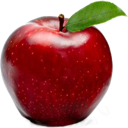

In [11]:
im = Image.open(dest)
im.to_thumb(128,128)

In [12]:
fruit_types = 'apple','orange','pear'
path = Path('fruits')

In [13]:
if not path.exists():
    path.mkdir()
    for o in fruit_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing('a7e5290c71534363978582d101dd3c22', f'{o} fruit')
        download_images(dest, urls=results.attrgot('contentUrl')) #

In [14]:
fns = get_image_files(path)
fns

(#378) [Path('fruits/apple/00000001.jpg'),Path('fruits/apple/00000002.jpg'),Path('fruits/apple/00000003.jpg'),Path('fruits/apple/00000004.jpg'),Path('fruits/apple/00000005.jpg'),Path('fruits/apple/00000006.jpg'),Path('fruits/apple/00000007.jpg'),Path('fruits/apple/00000008.jpg'),Path('fruits/apple/00000009.jpg'),Path('fruits/apple/00000010.jpg')...]

In [15]:
failed = verify_images(fns)
failed

(#0) []

In [16]:
failed.map(Path.unlink);

In [17]:
fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [18]:
dls = fruits.dataloaders(path)

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


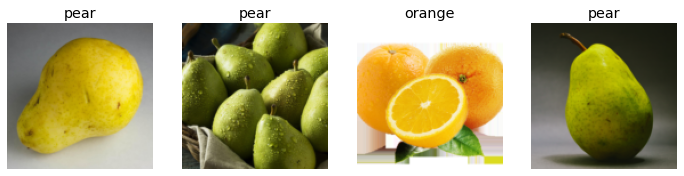

In [19]:
dls.valid.show_batch(max_n=4, nrows=1)

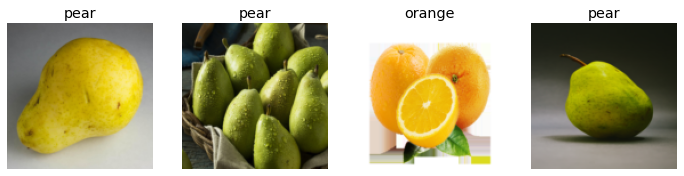

In [20]:
fruits = fruits.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

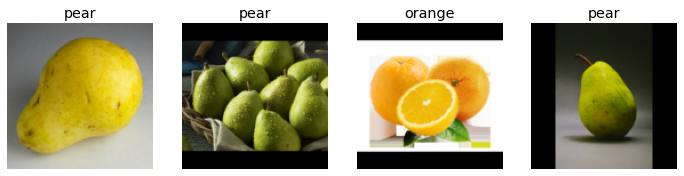

In [21]:
fruits = fruits.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

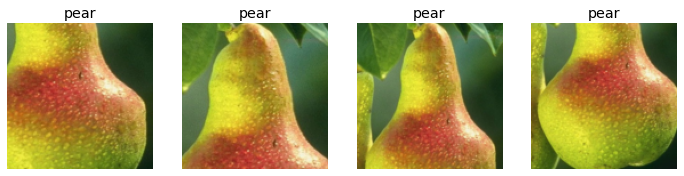

In [22]:
fruits = fruits.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = fruits.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

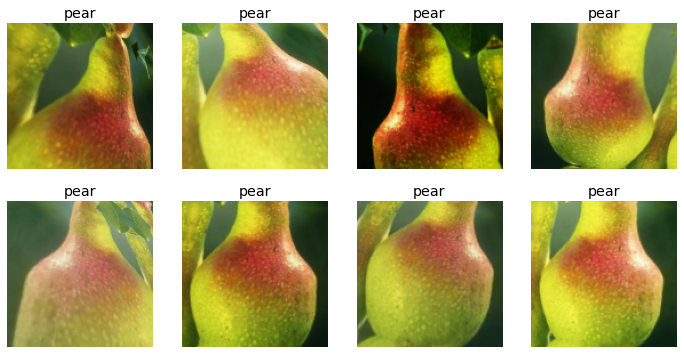

In [23]:
#data augmentation
fruits = fruits.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = fruits.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [24]:
# Training Your Model, and Using It to Clean Your Data
fruits = fruits.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = fruits.dataloaders(path)

In [25]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.653331,0.557329,0.226667,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.481143,0.295403,0.080000,00:13
1,0.395528,0.179334,0.066667,00:12
2,0.306521,0.170771,0.066667,00:11
3,0.245533,0.183516,0.066667,00:11


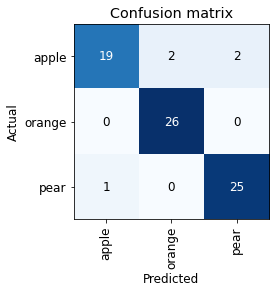

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

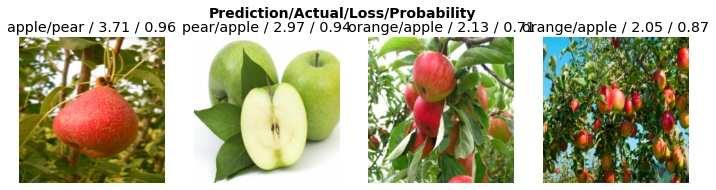

In [27]:
interp.plot_top_losses(4, nrows=1)

In [28]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [29]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [30]:
# Turning Your Model into an Online Application
# Using the Model for Inference
learn.export()

In [31]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [33]:
learn_inf.predict('images/apple.png')

('apple', tensor(0), tensor([9.9956e-01, 5.7715e-06, 4.3569e-04]))

In [34]:
learn_inf.dls.vocab

['apple', 'orange', 'pear']

In [35]:
# Creating a Notebook App from the Model
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [36]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/apple.png'])

In [37]:
img = PILImage.create(btn_upload.data[-1])

In [38]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [39]:
pred,pred_idx,probs = learn_inf.predict(img)

In [40]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: apple; Probability: 0.9996')

In [41]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [42]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [43]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [44]:
VBox([widgets.Label('Select your fruit!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [45]:
#Turning Your Notebook into a Real App

!pip install voila
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.4 OK
